<a href="https://colab.research.google.com/github/mdshihabmahmud/StudentsMarksStoreSystem/blob/master/HatePost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import re
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
import string

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/HatePost.csv'
df = pd.read_csv(path)

In [ ]:
df

,Serial,Hateposts
0,1,any wn in the the lancaster leominster clinton...
1,2,i m im 8th grade and im 14
2,3,i ve told my friends and all of them agree wit...
3,4,i guess i was lucky because all my friends wer...
4,5,normal hair is no fun braveheart nature intend...
...,...,...
5994,5995,i was also wondering if any of you all believe...
5995,5996,it s really not our faith of choice that matte...
5996,5997,seriously this guy is very primitive even for ...
5997,5998,i d put him somewhere between the typical afri...


In [ ]:
df

,Serial,Hateposts,Subjectivity,Polarity
0,1,any wn in the the lancaster leominster clinton...,0.000000,0.000000
1,2,i m im 8th grade and im 14,0.000000,0.000000
2,3,i ve told my friends and all of them agree wit...,0.650000,-0.050000
3,4,i guess i was lucky because all my friends wer...,0.319444,0.111111
4,5,normal hair is no fun braveheart nature intend...,0.320000,0.030000
...,...,...,...,...
5994,5995,i was also wondering if any of you all believe...,0.900000,0.700000
5995,5996,it s really not our faith of choice that matte...,0.200000,-0.100000
5996,5997,seriously this guy is very primitive even for ...,0.466667,-0.100000
5997,5998,i d put him somewhere between the typical afri...,0.250000,-0.083333


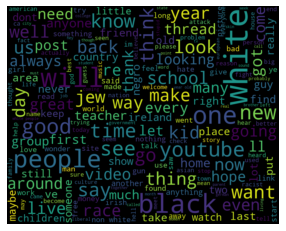

In [ ]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([twts for twts in df['Hateposts']])
wordCloud = WordCloud(width =1000, height =800, random_state = 15, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Class'] = df['Polarity'].apply(getAnalysis)

In [ ]:
df

,Serial,Hateposts,Subjectivity,Polarity,Class
0,1,any wn in the the lancaster leominster clinton...,0.000000,0.000000,Neutral
1,2,i m im 8th grade and im 14,0.000000,0.000000,Neutral
2,3,i ve told my friends and all of them agree wit...,0.650000,-0.050000,Negative
3,4,i guess i was lucky because all my friends wer...,0.319444,0.111111,Positive
4,5,normal hair is no fun braveheart nature intend...,0.320000,0.030000,Positive
...,...,...,...,...,...
5994,5995,i was also wondering if any of you all believe...,0.900000,0.700000,Positive
5995,5996,it s really not our faith of choice that matte...,0.200000,-0.100000,Negative
5996,5997,seriously this guy is very primitive even for ...,0.466667,-0.100000,Negative
5997,5998,i d put him somewhere between the typical afri...,0.250000,-0.083333,Negative


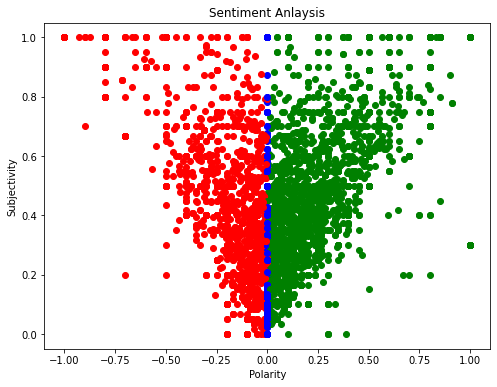

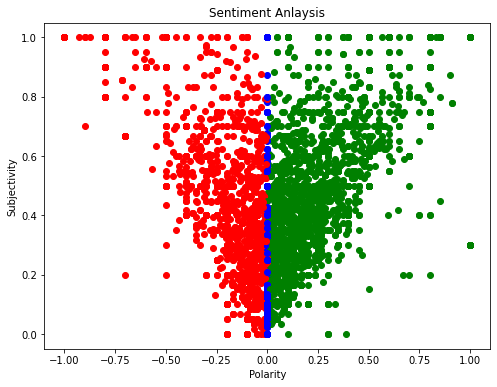

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  if df['Class'][i] == 'Neutral':
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
  elif df['Class'][i] == 'Positive':
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green')
  else:
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')


plt.title('Sentiment Anlaysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show('')

In [ ]:
ptweets = df[df.Class == 'Positive']
ptweets = ptweets['Hateposts']
round((ptweets.shape[0]/df.shape[0]*100), 1)

38.6

In [ ]:
ntweets = df[df.Class == 'Negative']
ntweets = ntweets['Hateposts']
round((ntweets.shape[0]/df.shape[0]*100), 1)

22.4

In [ ]:
nttweets = df[df.Class == 'Neutral']
nttweets = nttweets['Hateposts']
round((nttweets.shape[0]/df.shape[0]*100), 1)

39.0

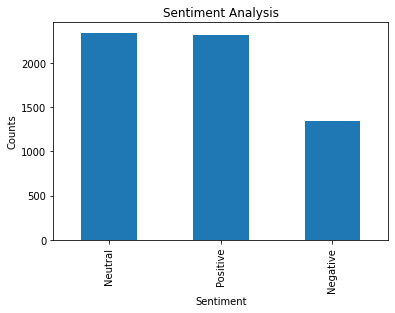

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['Class'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Class'].value_counts().plot(kind='bar')
plt.show()